In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)
# Combine the data into a single dataset
main_df = city_data.merge(ride_data)
# Display the data table for preview
main_df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [2]:
driver_df = pd.DataFrame(main_df.groupby("city")["driver_count"].mean())
#urban_rides = pd.DataFrame(urban_df.groupby("city")["ride_id"].nunique())
driver_df.head()

,driver_count
city,
Amandaburgh,12
Barajasview,26
Barronchester,11
Bethanyland,22
Bradshawfurt,7


In [3]:
rural_df = main_df[main_df["type"] == "Rural"]
rural_df.head()

,city,driver_count,type,date,fare,ride_id
2250,South Jennifer,7,Rural,2018-04-01 09:32:45,21.63,9135979586871
2251,South Jennifer,7,Rural,2018-03-07 19:10:13,48.79,9730627367446
2252,South Jennifer,7,Rural,2018-04-05 14:35:42,32.20,683983658392
2253,South Jennifer,7,Rural,2018-04-02 10:26:50,14.11,3828267773041
2254,South Jennifer,7,Rural,2018-04-10 20:46:11,43.25,623928772332


In [4]:
suburban_df = main_df[main_df["type"] == "Suburban"]
suburban_df.head()

,city,driver_count,type,date,fare,ride_id
1625,Port Shane,7,Suburban,2018-04-09 15:34:40,27.66,4022340141966
1626,Port Shane,7,Suburban,2018-04-23 16:05:47,42.26,8341982666719
1627,Port Shane,7,Suburban,2018-03-02 12:06:00,14.95,2803204948363
1628,Port Shane,7,Suburban,2018-03-26 04:33:30,19.03,6010401984537
1629,Port Shane,7,Suburban,2018-03-15 12:09:42,31.58,2552978514662


In [5]:
urban_df = main_df[main_df["type"] == "Urban"]
urban_df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [6]:
urban_rides = pd.DataFrame(urban_df.groupby("city")["ride_id"].nunique())
urban_rides.head()

,ride_id
city,
Amandaburgh,18
Barajasview,22
Carriemouth,27
Christopherfurt,27
Deanville,19


In [7]:
urban_avg = pd.DataFrame(urban_df.groupby("city")["fare"].mean())
urban_avg.head()

,fare
city,
Amandaburgh,24.641667
Barajasview,25.332273
Carriemouth,28.314444
Christopherfurt,24.501852
Deanville,25.842632


In [8]:
urban_merge = urban_rides.merge(urban_avg, left_on="city", right_on="city")
urban_merge.head()

,ride_id,fare
city,,
Amandaburgh,18,24.641667
Barajasview,22,25.332273
Carriemouth,27,28.314444
Christopherfurt,27,24.501852
Deanville,19,25.842632


In [9]:
suburban_rides = pd.DataFrame(suburban_df.groupby("city")["ride_id"].nunique())
#start here - get avg for suburban and rural, then merge them, then plot them.
suburban_avg = pd.DataFrame(suburban_df.groupby("city")["fare"].mean())
suburban_avg.head()

,fare
city,
Barronchester,36.422500
Bethanyland,32.956111
Brandonfort,35.437368
Colemanland,30.894545
Davidfurt,31.995882


In [10]:
suburban_merge = suburban_rides.merge(suburban_avg, left_on="city", right_on="city")
suburban_merge.head()

,ride_id,fare
city,,
Barronchester,16,36.422500
Bethanyland,18,32.956111
Brandonfort,19,35.437368
Colemanland,22,30.894545
Davidfurt,17,31.995882


In [11]:
rural_rides = pd.DataFrame(rural_df.groupby("city")["ride_id"].nunique())
rural_avg = pd.DataFrame(rural_df.groupby("city")["fare"].mean())
rural_avg.head()

,fare
city,
Bradshawfurt,40.064000
Garzaport,24.123333
Harringtonfort,33.470000
Jessicaport,36.013333
Lake Jamie,34.358333


In [12]:
rural_merge = rural_rides.merge(rural_avg, left_on="city", right_on="city")
rural_merge.head()

,ride_id,fare
city,,
Bradshawfurt,10,40.064000
Garzaport,3,24.123333
Harringtonfort,6,33.470000
Jessicaport,6,36.013333
Lake Jamie,6,34.358333


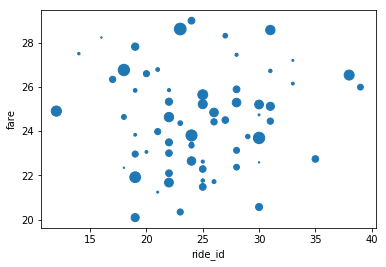

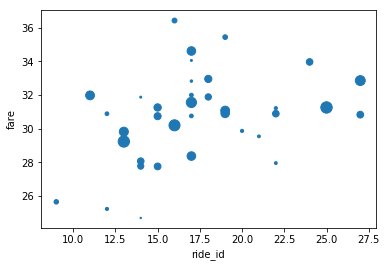

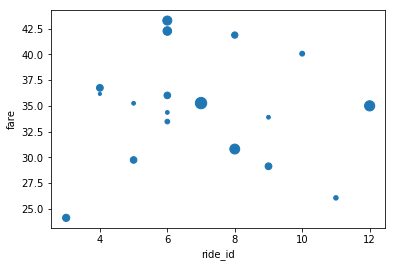

In [13]:
# Obtain the x and y coordinates for each of the three city types

# df.plot.scatter(x='a', y='b', s=df['c']*200);

urban_merge.plot.scatter(x="ride_id", y="fare", s=driver_df["driver_count"]*2)
suburban_merge.plot.scatter(x="ride_id", y="fare", s=driver_df["driver_count"]*2)
rural_merge.plot.scatter(x="ride_id", y="fare", s=driver_df["driver_count"]*2)
# Build the scatter plots for each city types

# Incorporate the other graph properties

# Create a legend

# Incorporate a text label regarding circle size

# Save Figure

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: The set_color_cycle function was deprecated in version 1.5. Use `.set_prop_cycle` instead.
  This is separate from the ipykernel package so we can avoid doing imports until


<Figure size 432x288 with 0 Axes>

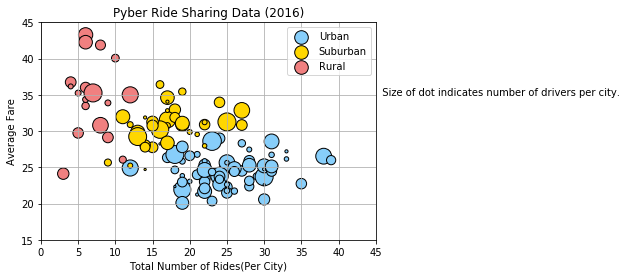

In [56]:
fig = plt.figure()
fig, ax = plt.subplots()
ax.set_color_cycle(['lightskyblue', 'gold', 'lightcoral'])
for frame in [urban_merge, suburban_merge, rural_merge]:
    plt.scatter(frame['ride_id'], frame['fare'], s=driver_df["driver_count"]*5, edgecolors='k')

plt.xlim(0,45)
plt.ylim(15,45)
plt.grid()
plt.xlabel("Total Number of Rides(Per City)")
plt.ylabel("Average Fare")
plt.title("Pyber Ride Sharing Data (2016)")
plt.legend(["Urban", "Suburban", "Rural"])
plt.annotate("  Size of dot indicates number of drivers per city.", (45,35))
plt.show()

In [17]:
main_df["fare"].sum()

63538.64

In [18]:
urban_df["fare"].sum()

39854.380000000005

In [19]:
suburban_df["fare"].sum()

19356.33

In [20]:
rural_df["fare"].sum()

4327.929999999999

Text(0.5,1,'Percentage of Fares by City Type')

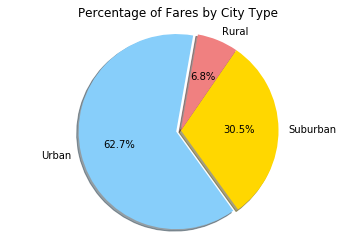

In [34]:
labels = ["Urban", "Suburban", "Rural"]
sizes = [39854.38, 19356.33, 4327.93]
colors = ['lightskyblue', 'gold', 'lightcoral']
explode = [0.05, 0, 0]
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=80)
plt.axis("equal")
plt.title("Percentage of Fares by City Type")

In [29]:
main_df["ride_id"].count()

2375

In [30]:
urban_df["ride_id"].count()

1625

In [31]:
suburban_df["ride_id"].count()

625

In [32]:
rural_df["ride_id"].count()

125

Text(0.5,1,'Percentage of Rides by City Type')

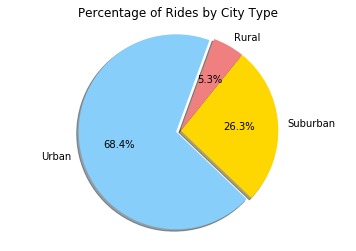

In [37]:
ride_labels = ["Urban", "Suburban", "Rural"]
ride_values = [1625, 625, 125]
ride_colors = ["lightskyblue", "gold", "lightcoral"]
explode = [0.05, 0, 0]
plt.pie(ride_values, explode=explode, labels=ride_labels, colors=ride_colors,
        autopct="%1.1f%%", shadow=True, startangle=70)
plt.axis("equal")
plt.title("Percentage of Rides by City Type")

In [38]:
driver_df["driver_count"].sum()

2973

In [42]:
#driver_df = pd.DataFrame(main_df.groupby("city")["driver_count"].mean())
urban_drivers = pd.DataFrame(urban_df.groupby("city")["driver_count"].mean())
urban_drivers.head()

,driver_count
city,
Amandaburgh,12
Barajasview,26
Carriemouth,52
Christopherfurt,41
Deanville,49


In [43]:
urban_drivers["driver_count"].sum()

2405

In [44]:
suburban_drivers = pd.DataFrame(suburban_df.groupby("city")["driver_count"].mean())
suburban_drivers["driver_count"].sum()

490

In [45]:
rural_drivers = pd.DataFrame(rural_df.groupby("city")["driver_count"].mean())
rural_drivers["driver_count"].sum()

78

([<matplotlib.patches.Wedge at 0x11631c240>,
 [Text(-0.934943,-0.669613,'Urban'),
  Text(0.94399,0.564698,'Suburban'),
  Text(0.460046,0.999178,'Rural')],
 [Text(-0.528446,-0.378477,'80.9%'),
  Text(0.514903,0.308017,'16.5%'),
  Text(0.250934,0.545006,'2.6%')])

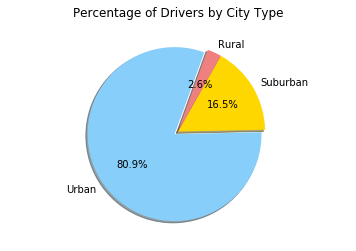

In [46]:
driver_values = [2405, 490, 78]
driver_labels = ["Urban", "Suburban", "Rural"]
driver_colors = ["lightskyblue", "gold", "lightcoral"]
explode = [0.05, 0, 0]
plt.axis("equal")
plt.title("Percentage of Drivers by City Type")
plt.pie(driver_values, explode=explode, labels=driver_labels, colors=driver_colors,
        autopct="%1.1f%%", shadow=True, startangle=70)

## Data Analysis

* Pyber activity is focused in urban areas. More than two-thirds of rides occur there, more than 60 percent of fare revenue is generated there, and that's where the overwhelming majority of drivers are.
* Average fares in suburban and rural areas are consistently higher than average fares in urban areas. This holds true even when the number of rides in a rural or suburban area is similar to the number of rides in an urban area.
* Rural and suburban areas accounted for 37.3 percent of overall fare revenue and 31.6 percent of total rides with 19.1 percent of the total drivers. 

In [47]:
urban_df.describe()

,driver_count,fare,ride_id
count,1625.000000,1625.000000,1.625000e+03
mean,36.678154,24.525772,4.873485e+12
std,20.075545,11.738649,2.907440e+12
min,3.000000,4.050000,1.458810e+10
25%,22.000000,14.550000,2.400244e+12
50%,37.000000,24.640000,4.711188e+12
75%,52.000000,34.580000,7.451579e+12
max,73.000000,44.970000,9.991538e+12
